In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("Desktop/Bangkok Housing Condo Apartment Prices.csv")

In [49]:
df.head()

,Property Type,Location,Area (sq. ft.),Bedrooms,Bathrooms,Price (THB)
0,Condo,Sukhumvit,700,1,1,2000000
1,House,Ladprao,1500,3,2,5000000
2,Apartment,Siam,900,2,1,3500000
3,Condo,Sathorn,1200,2,2,4500000
4,House,Ratchada,1800,4,3,8000000


In [50]:
df.shape

(563, 6)

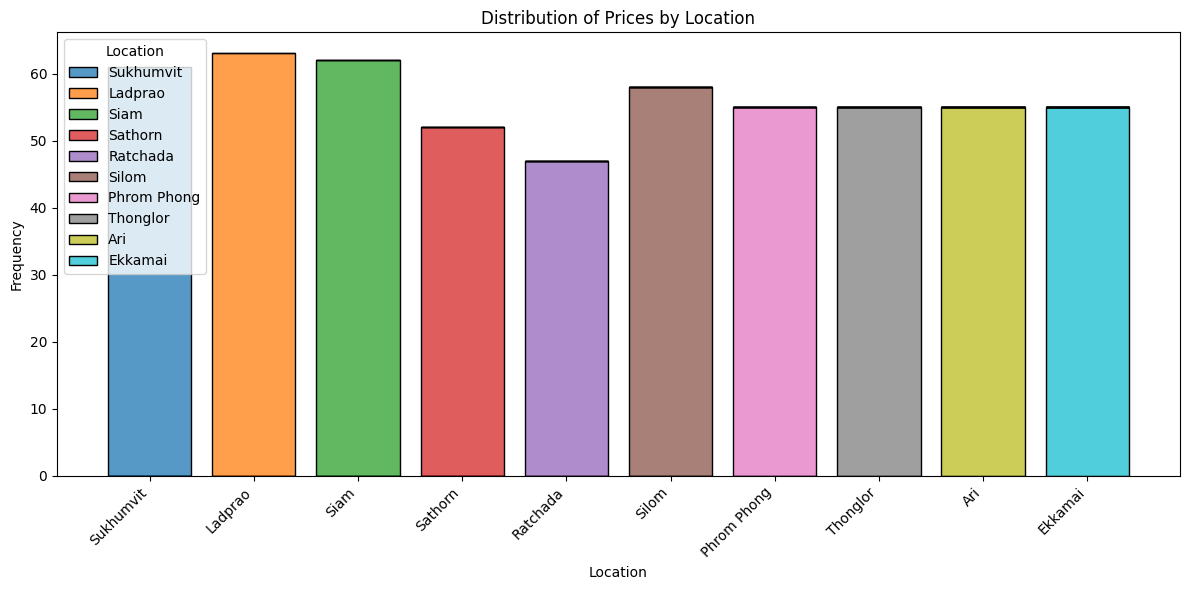

In [51]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Location', hue='Location', multiple='stack', shrink=0.8)
plt.title('Distribution of Prices by Location')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Training

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df.head()

,Property Type,Location,Area (sq. ft.),Bedrooms,Bathrooms,Price (THB)
0,Condo,Sukhumvit,700,1,1,2000000
1,House,Ladprao,1500,3,2,5000000
2,Apartment,Siam,900,2,1,3500000
3,Condo,Sathorn,1200,2,2,4500000
4,House,Ratchada,1800,4,3,8000000


In [54]:
property_type = pd.get_dummies(df["Property Type"])

In [55]:
property_type.head()

,Apartment,Condo,House
0,False,True,False
1,False,False,True
2,True,False,False
3,False,True,False
4,False,False,True


In [56]:
location = pd.get_dummies(df["Location"])

In [57]:
location.head()

,Ari,Ekkamai,Ladprao,Phrom Phong,Ratchada,Sathorn,Siam,Silom,Sukhumvit,Thonglor
0,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [58]:
combined_df = pd.concat([df, property_type, location], axis=1)

In [59]:
combined_df.head()

,Property Type,Location,Area (sq. ft.),Bedrooms,Bathrooms,Price (THB),Apartment,Condo,House,Ari,Ekkamai,Ladprao,Phrom Phong,Ratchada,Sathorn,Siam,Silom,Sukhumvit,Thonglor
0,Condo,Sukhumvit,700,1,1,2000000,False,True,False,False,False,False,False,False,False,False,False,True,False
1,House,Ladprao,1500,3,2,5000000,False,False,True,False,False,True,False,False,False,False,False,False,False
2,Apartment,Siam,900,2,1,3500000,True,False,False,False,False,False,False,False,False,True,False,False,False
3,Condo,Sathorn,1200,2,2,4500000,False,True,False,False,False,False,False,False,True,False,False,False,False
4,House,Ratchada,1800,4,3,8000000,False,False,True,False,False,False,False,True,False,False,False,False,False


In [60]:
combined_df.drop(columns=['Property Type', 'Location'], inplace=True)

In [61]:
combined_df.head()

,Area (sq. ft.),Bedrooms,Bathrooms,Price (THB),Apartment,Condo,House,Ari,Ekkamai,Ladprao,Phrom Phong,Ratchada,Sathorn,Siam,Silom,Sukhumvit,Thonglor
0,700,1,1,2000000,False,True,False,False,False,False,False,False,False,False,False,True,False
1,1500,3,2,5000000,False,False,True,False,False,True,False,False,False,False,False,False,False
2,900,2,1,3500000,True,False,False,False,False,False,False,False,False,True,False,False,False
3,1200,2,2,4500000,False,True,False,False,False,False,False,False,True,False,False,False,False
4,1800,4,3,8000000,False,False,True,False,False,False,False,True,False,False,False,False,False


In [62]:
combined_df.columns

Index(['Area (sq. ft.)', 'Bedrooms', 'Bathrooms', 'Price (THB)', 'Apartment',
       'Condo', 'House', 'Ari', 'Ekkamai', 'Ladprao', 'Phrom Phong',
       'Ratchada', 'Sathorn', 'Siam', 'Silom', 'Sukhumvit', 'Thonglor'],
      dtype='object')

In [64]:
X = combined_df[['Area (sq. ft.)', 'Bedrooms', 'Bathrooms', 'Apartment',
       'Condo', 'House', 'Ari', 'Ekkamai', 'Ladprao', 'Phrom Phong',
       'Ratchada', 'Sathorn', 'Siam', 'Silom', 'Sukhumvit', 'Thonglor']]

In [84]:
y = combined_df[['Price (THB)']]

In [85]:
X.head()

,Area (sq. ft.),Bedrooms,Bathrooms,Apartment,Condo,House,Ari,Ekkamai,Ladprao,Phrom Phong,Ratchada,Sathorn,Siam,Silom,Sukhumvit,Thonglor
0,700,1,1,False,True,False,False,False,False,False,False,False,False,False,True,False
1,1500,3,2,False,False,True,False,False,True,False,False,False,False,False,False,False
2,900,2,1,True,False,False,False,False,False,False,False,False,True,False,False,False
3,1200,2,2,False,True,False,False,False,False,False,False,True,False,False,False,False
4,1800,4,3,False,False,True,False,False,False,False,True,False,False,False,False,False


In [86]:
y.head()

,Price (THB)
0,2000000
1,5000000
2,3500000
3,4500000
4,8000000


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [90]:
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Train RMSE: 252115.3445696635
Test RMSE: 227443.14999622916
Train R-squared: 0.9895085329445181
Test R-squared: 0.992758955587809


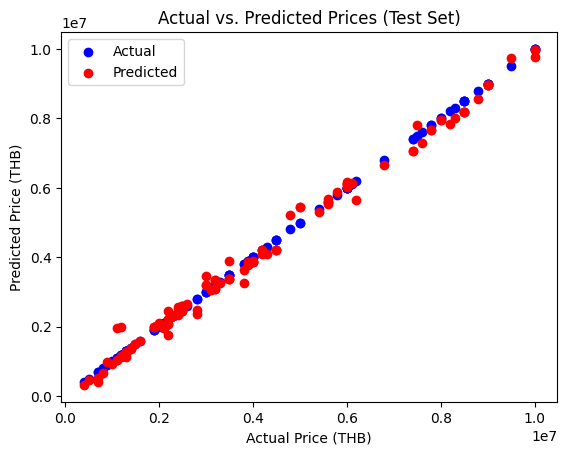

In [74]:
plt.scatter(y_test, y_test, color='blue', label='Actual')

plt.scatter(y_test, y_pred_test, color='red', label='Predicted')

plt.xlabel("Actual Price (THB)")
plt.ylabel("Predicted Price (THB)")
plt.title("Actual vs. Predicted Prices (Test Set)")
plt.legend()
plt.show()


Program

In [80]:
import numpy as np

# Trained regression model (replace this with your trained model)
def predict_price(area, bedrooms, bathrooms, property_type, location):
    # Example: Replace this with your regression model prediction code
    return np.random.randint(100000, 1000000)

def main():
    # Input feature values
    area = float(input("Enter area in sq. ft.: "))
    bedrooms = int(input("Enter number of bedrooms: "))
    bathrooms = int(input("Enter number of bathrooms: "))
    property_type = input("Enter property type (Apartment/Condo/House): ")
    location = input("Enter location: ")

    # Predict price
    predicted_price = predict_price(area, bedrooms, bathrooms, property_type, location)
    print("Predicted Price (THB):", predicted_price)

if __name__ == "__main__":
    main()


Enter area in sq. ft.: 1000
Enter number of bedrooms: 1
Enter number of bathrooms: 1
Enter property type (Apartment/Condo/House): Condo
Enter location: Siam
Predicted Price (THB): 958160
